In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
import numpy as np
import pandas as pd

In [3]:
trainData = pd.read_csv("./sign_mnist_train.csv")
testData = pd.read_csv("./sign_mnist_test.csv")

# Prezentacja danych

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Wyswietlamy dane

In [5]:
trainData.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Sprawdzamy tez dostepne kolumny

In [6]:
trainData.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

Interesuje nas tez ile symboli jest danego typu

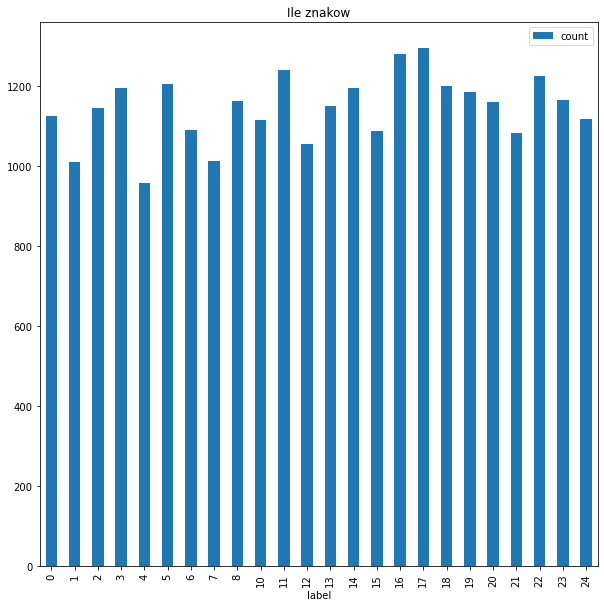

In [7]:
trainData.groupby(['label']).label.agg(['count']).plot.bar(figsize=(10, 10));
plt.title('Ile znakow');

Dzielimy i chcemy przygotowac dane

In [28]:
y_train = trainData['label']
y_test = testData['label']

X_train = trainData.copy()
X_test = testData.copy()

del X_train['label']
del X_test['label']

X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

X_train = X_train / 255
X_test = X_test / 255

Wyswietlamy tez przykladowe symbole

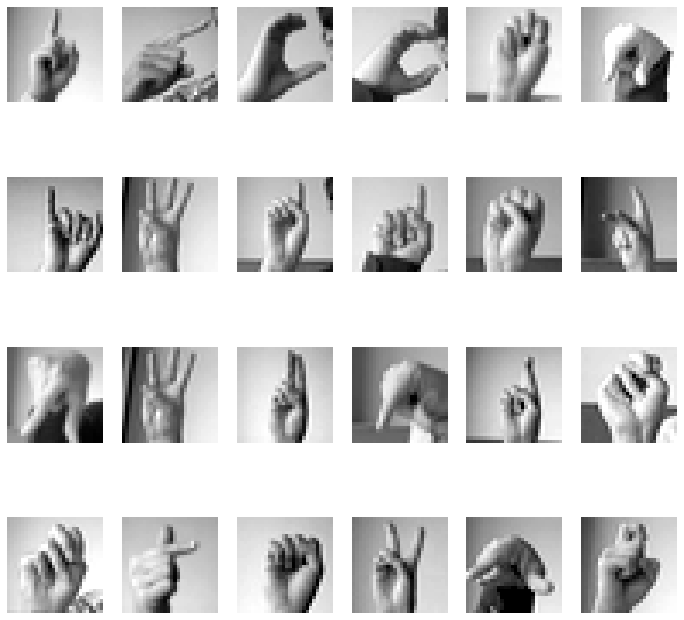

In [31]:
fig = plt.figure(figsize=(12,12))
    
for i in range(4):
    for j in range(6):
        fig.add_subplot(4,6,i*6+j+1) 
        plt.imshow(X_train[i*6+j].reshape(28,28), cmap="gray")
        plt.axis("off")
    
plt.show()

Z ciekawosci sprawdzam tez czy policzenie srednich moze dac nam jakies podzielenie danych

In [12]:
trainData.groupby(['label']).agg(['mean'])

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
label,,,,,,,,,,,,,,,,,,,,,
0,164.192718,165.654529,162.869449,161.313499,164.491119,166.727353,167.836590,168.973357,170.000888,170.912078,...,150.468028,160.253108,176.450266,187.197158,188.055062,184.572824,182.956483,182.216696,178.341918,174.761989
1,145.215842,147.747525,150.145545,152.939604,153.605941,156.361386,158.268317,159.686139,161.683168,163.297030,...,115.632673,141.738614,148.600000,147.710891,147.746535,147.806931,147.411881,146.214851,141.502970,135.559406
2,160.759615,163.133741,165.435315,167.272727,168.677448,169.820804,170.624126,171.098776,171.569056,171.852273,...,204.282343,203.943182,203.489510,205.226399,204.839161,203.986014,203.624126,203.402972,202.751748,198.966783
3,135.755853,139.376254,143.024247,148.172241,152.219900,155.625418,158.278428,160.520067,162.428930,163.739130,...,111.417224,121.210702,134.167224,142.347826,142.612040,143.934783,145.229933,143.940635,144.337793,139.172241
4,165.823406,167.623824,169.475444,171.073145,172.587252,173.821317,174.794148,175.515152,176.350052,177.073145,...,108.669801,133.425287,151.493208,167.268548,177.102403,179.031348,177.304075,174.777429,174.463950,176.704284
5,142.225914,146.210963,149.949336,153.074751,156.021595,158.924419,161.091362,162.809801,164.390365,165.755814,...,160.012458,167.903654,172.402824,173.190199,173.875415,172.589701,171.991694,170.939369,168.640365,168.648671
6,172.902752,174.281651,175.629358,177.147706,178.300917,179.241284,179.950459,180.405505,180.885321,181.056881,...,140.392661,139.537615,141.325688,139.804587,138.225688,138.670642,137.563303,132.542202,133.037615,130.490826
7,164.142152,166.440276,168.638697,170.805528,172.312932,173.537019,174.420533,175.444225,176.389931,177.032577,...,158.322804,156.843040,153.355380,158.425469,157.021718,155.765054,154.955577,146.279368,140.607108,141.894373


In [13]:
show_mean = trainData.groupby(['label']).agg(['mean']).reset_index().copy()


In [14]:
del show_mean['label']

show_mean_np = show_mean.to_numpy().reshape(-1,28,28)


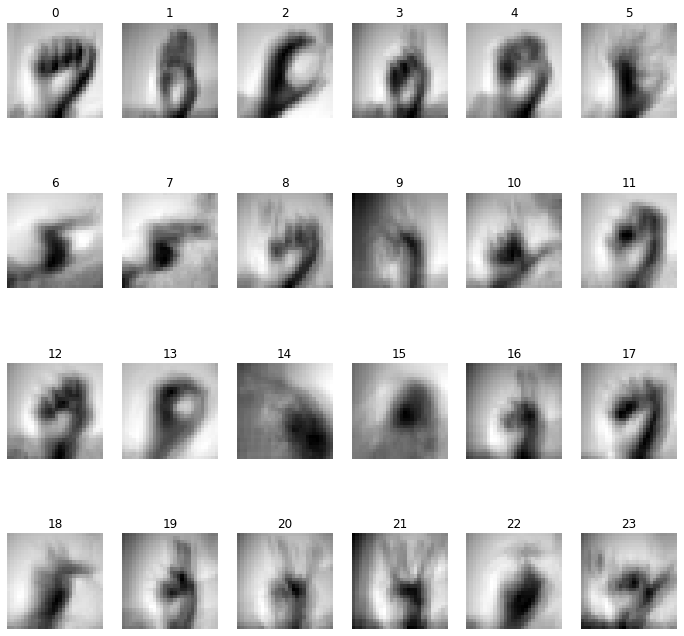

In [26]:
fig = plt.figure(figsize=(12,12))
    
for i in range(4):
    for j in range(6):
        fig.add_subplot(4,6,i*6+j+1) 
        plt.imshow(show_mean_np[i*6+j], cmap="gray")
        plt.axis("off")
        plt.title(i*6+j)
    
plt.show()

# Modele
Wyswietle tu wyniki z modeli ktore zostaly wyszukane gridserachem lub z innego notebooka.

Wykonalem to ze wzgledu na bardzo dlugi czas przeliczania modeli

In [68]:
modelCNN = keras.models.load_model('./CNN_Model')

In [72]:
from sklearn.svm import SVC
modelSVM_RBF = SVC(C=10, gamma=0.01, kernel='rbf')
modelSVM_RBF.fit(X_train.reshape(len(X_train),28*28),y_train)

SVC(C=10, gamma=0.01)

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [139]:
svm_predict = modelSVM_RBF.predict(X_test.reshape(len(X_test),28*28))
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       1.00      0.98      0.99       432
           2       0.83      0.98      0.90       310
           3       0.97      1.00      0.98       245
           4       0.93      1.00      0.96       498
           5       0.78      0.83      0.81       247
           6       0.90      0.89      0.90       348
           7       0.97      0.90      0.93       436
           8       0.74      0.85      0.79       288
          10       0.63      0.47      0.54       331
          11       0.83      0.89      0.86       209
          12       0.81      0.70      0.75       394
          13       0.89      0.65      0.75       291
          14       0.92      0.80      0.85       246
          15       1.00      1.00      1.00       347
          16       0.92      0.99      0.95       164
          17       0.25      0.47      0.32       144
          18       0.64    

In [135]:
y_test_fix = np.copy(y_test)
y_test_fix[y_test_fix>=9] = y_test_fix[y_test_fix>=9]-1

In [141]:
cnn_predict = np.argmax(modelCNN.predict(X_test), axis=-1)
print(classification_report(y_test_fix, cnn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       1.00      1.00      1.00       394
          12       1.00      1.00      1.00       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       1.00      1.00      1.00       144
          17       1.00    

Heat mapy dla wynikow pokazujace gdzie sa bledy

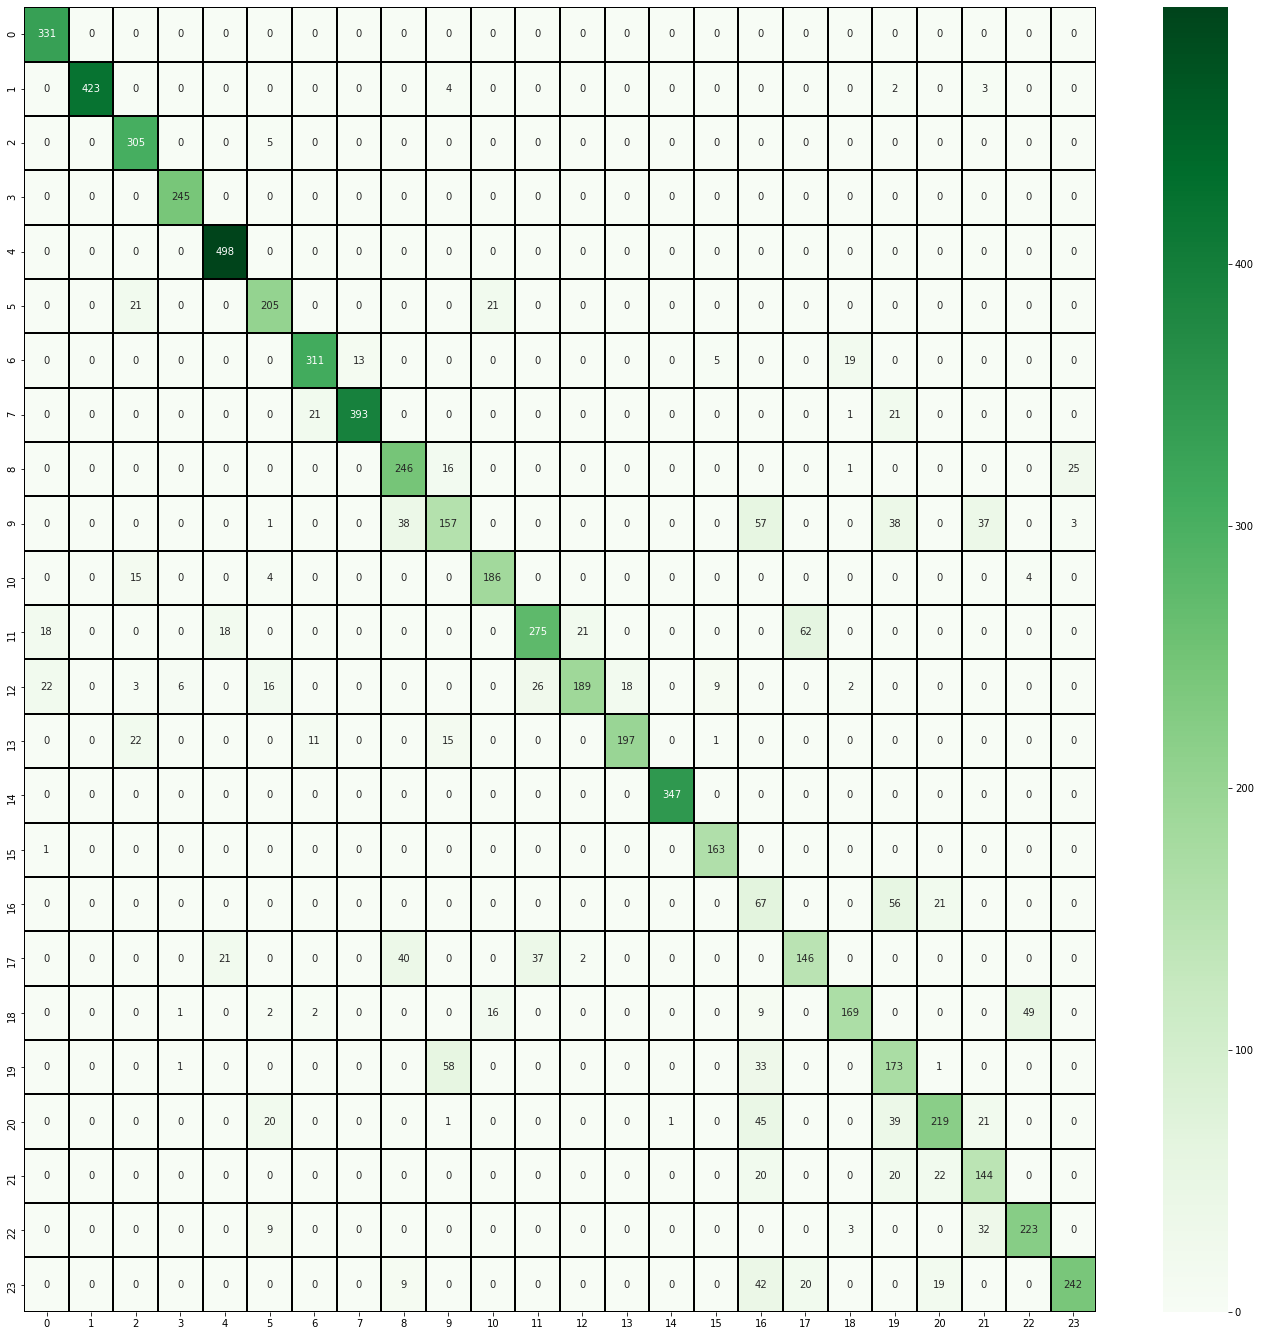

In [157]:
cm_svm = confusion_matrix(y_test, svm_predict)
plt.figure(figsize=(24,24))
sns.heatmap(cm_svm, cmap="Greens", linecolor='black',linewidth=1,annot=True,fmt='')

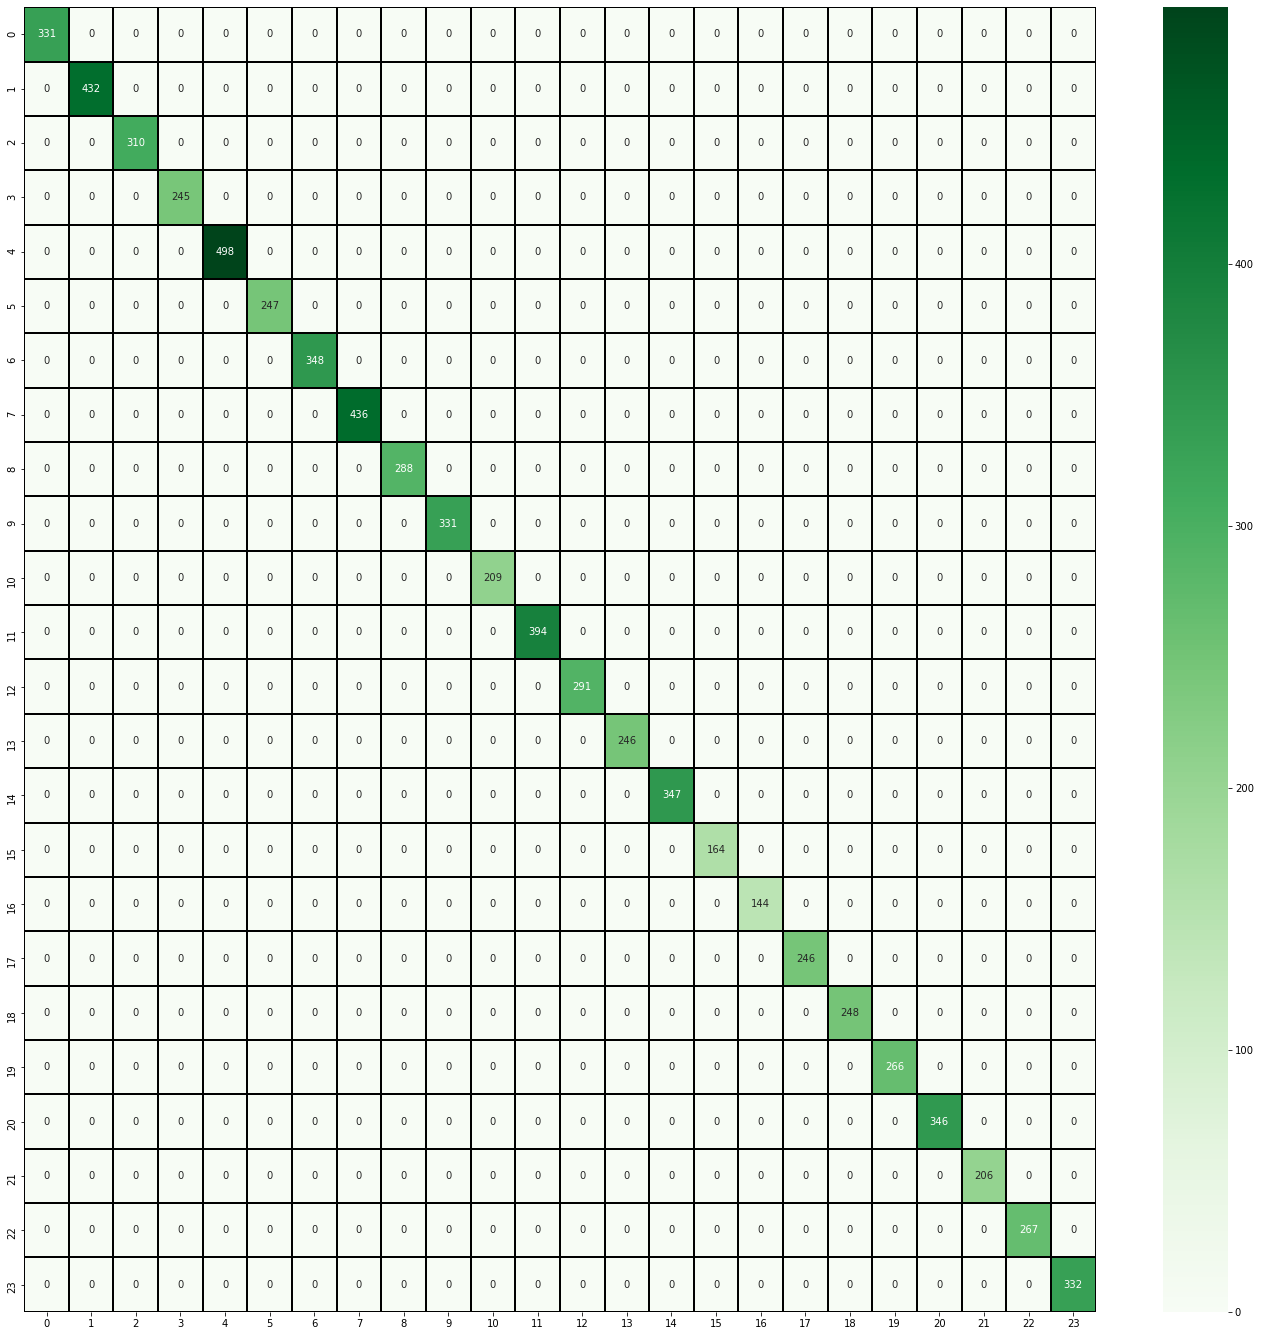

In [159]:
cm_cnn = confusion_matrix(y_test_fix, cnn_predict)
plt.figure(figsize=(24,24))
sns.heatmap(cm_cnn, cmap="Greens", linecolor='black',linewidth=1,annot=True,fmt='')

# Wizualizacja warstw

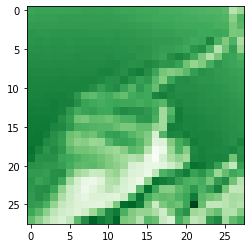

In [244]:
plt.imshow(X_train[1].reshape(28,28), cmap="Greens")

In [238]:
output_layers = [layer.output for layer in modelCNN.layers[:-4:]]
activation_model = keras.models.Model(inputs=modelCNN.input, outputs=output_layers)
output_layers

[<tf.Tensor 'conv2d_4/Identity:0' shape=(None, 28, 28, 100) dtype=float32>,
 <tf.Tensor 'batch_normalization_4/Identity:0' shape=(None, 28, 28, 100) dtype=float32>,
 <tf.Tensor 'activation_4/Identity:0' shape=(None, 28, 28, 100) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/Identity:0' shape=(None, 14, 14, 100) dtype=float32>,
 <tf.Tensor 'dropout_5/Identity:0' shape=(None, 14, 14, 100) dtype=float32>,
 <tf.Tensor 'conv2d_5/Identity:0' shape=(None, 14, 14, 75) dtype=float32>,
 <tf.Tensor 'batch_normalization_5/Identity:0' shape=(None, 14, 14, 75) dtype=float32>,
 <tf.Tensor 'activation_5/Identity:0' shape=(None, 14, 14, 75) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5/Identity:0' shape=(None, 7, 7, 75) dtype=float32>,
 <tf.Tensor 'dropout_6/Identity:0' shape=(None, 7, 7, 75) dtype=float32>,
 <tf.Tensor 'conv2d_6/Identity:0' shape=(None, 7, 7, 50) dtype=float32>,
 <tf.Tensor 'batch_normalization_6/Identity:0' shape=(None, 7, 7, 50) dtype=float32>,
 <tf.Tensor 'activation_6/Identity:0' sh

In [291]:
def plot_layer(layer,i,layer_name = None):
    
    rows = layer.shape[-1] / 25
    
    fig = plt.figure(figsize=(25,rows))
    
    for i in range(layer.shape[-1]):
        fig.add_subplot(rows,25,i+1) 
        plt.imshow(layer[0,:,:,i].reshape([layer.shape[1],layer.shape[2]]),cmap="Greens")
        plt.axis("off")
    
    plt.suptitle(layer_name,fontsize=14)
    plt.show()

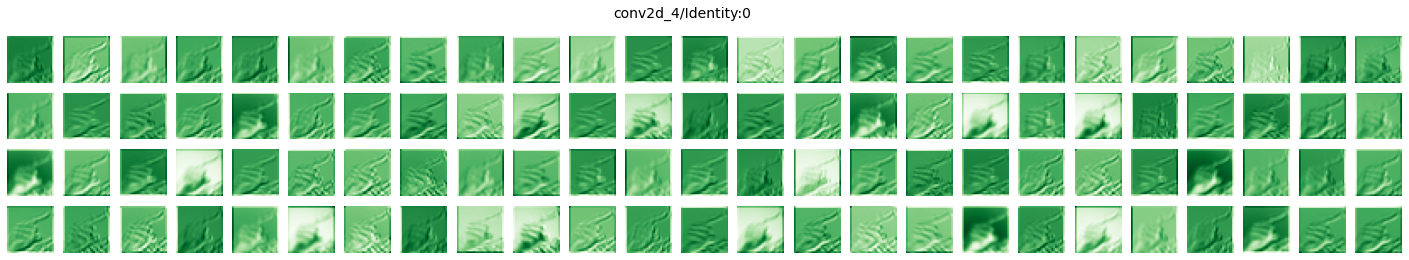

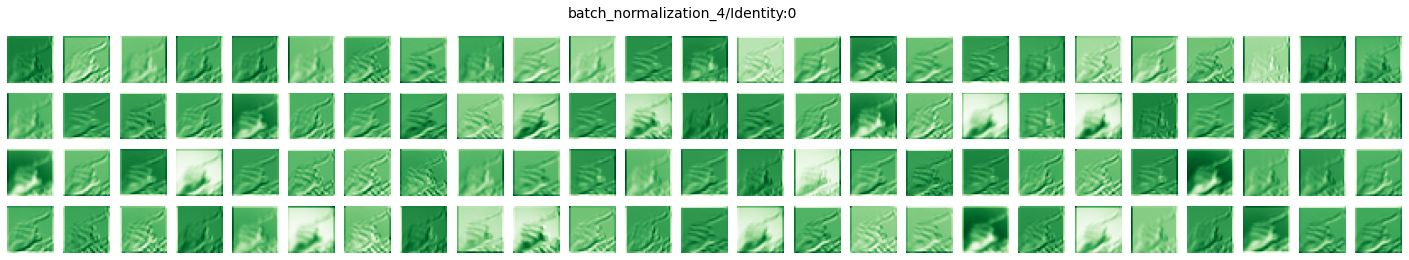

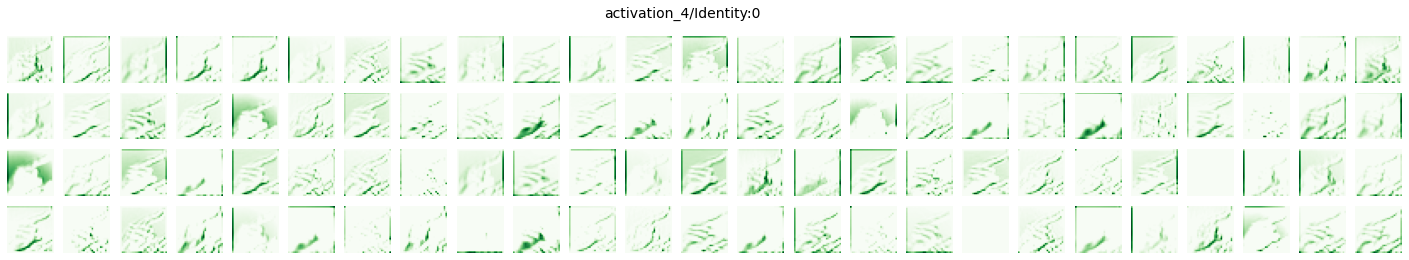

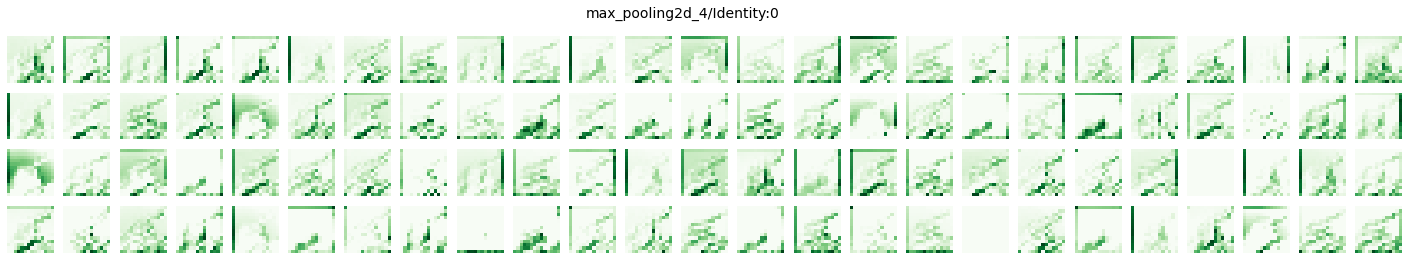

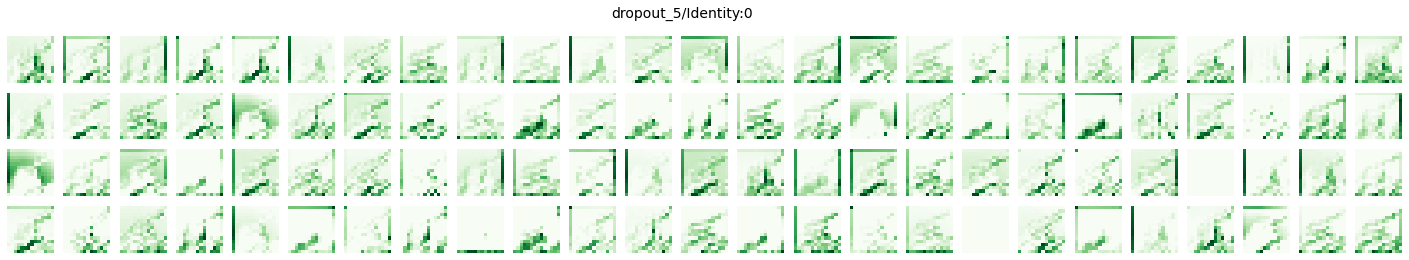

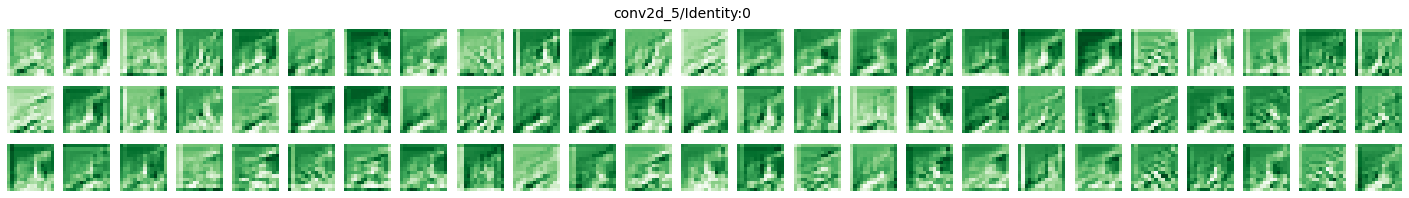

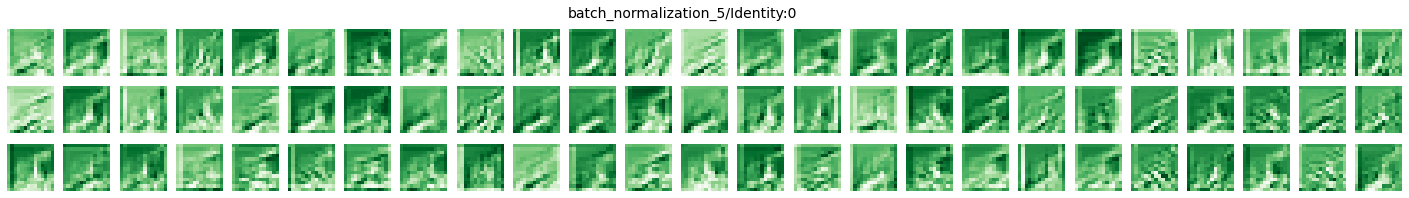

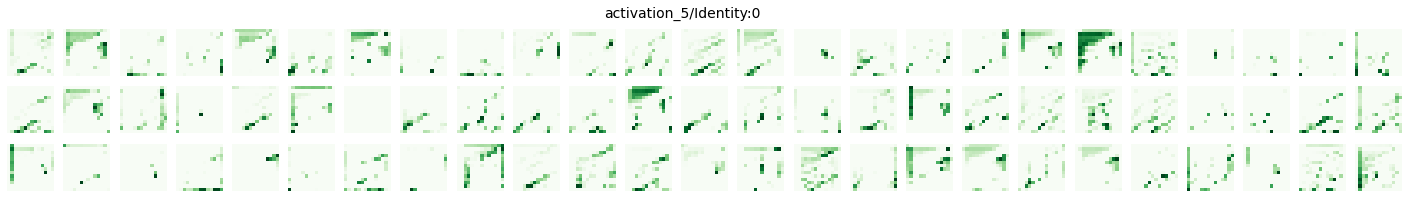

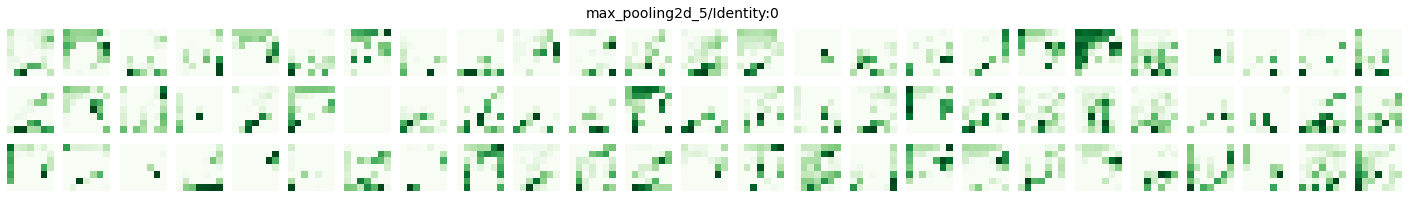

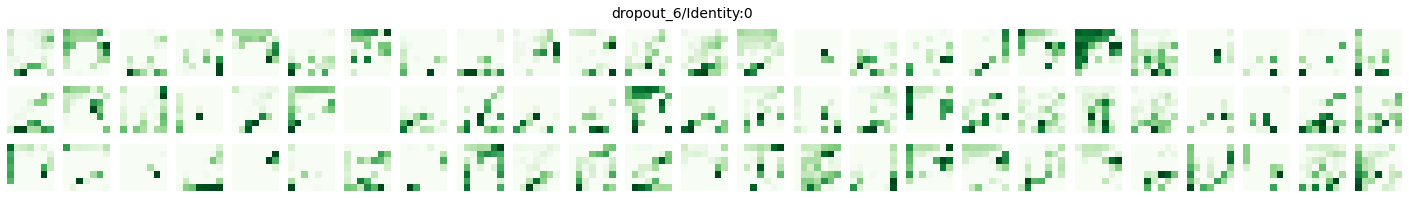

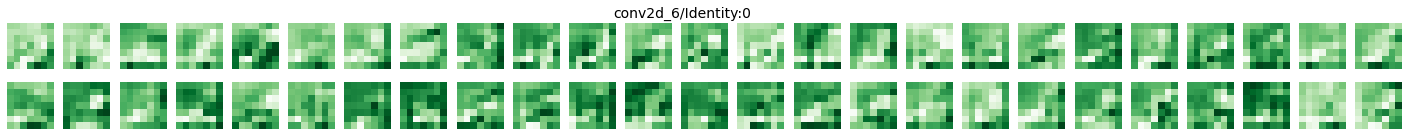

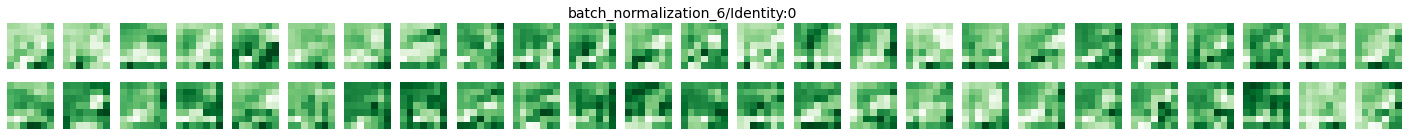

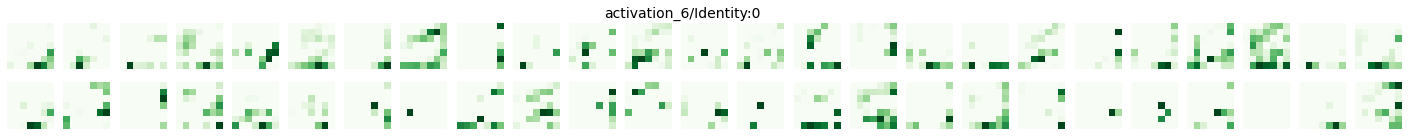

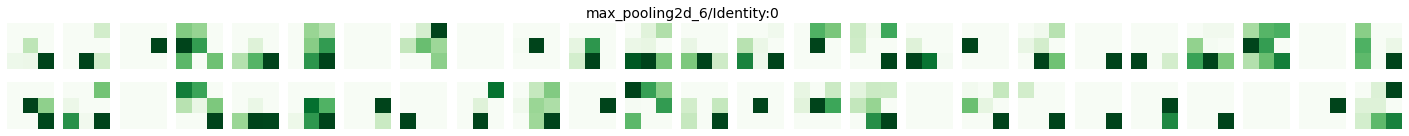

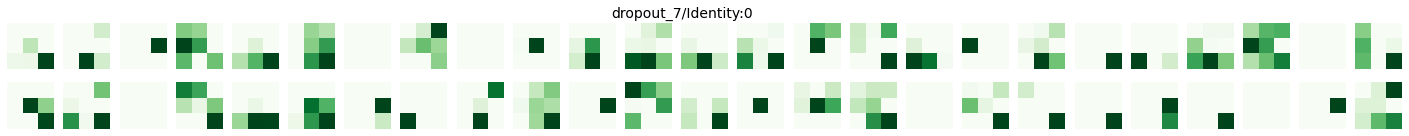

In [292]:
for i,layer in enumerate(activation_model.predict(X_train[1].reshape([1,28,28,1]))):
    plot_layer(layer,i,output_layers[i].name)